# Problem Statement

X Education Company wishes to identify the most potential leads, also known as “Hot Leads”. The company needs a model wherein 
a lead score is assigned to each of the leads such that the customer with higher lead score have a higher conversion chance 
and customer with lower lead score have a lower conversion chance. The CEO, has given a number for the lead conversion rate 
i.e. 80% .Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used 
by the company to target potential leads. 

## Step 1: Importing the necessary libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Linear Regression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Model Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Importing the Data and Understanding the Data

In [2]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead.shape

(9240, 37)

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Calculating the Missing Data Percentage 
round(lead.isnull().sum()/lead.shape[0],2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

## Step 3: Data Preparation 

### Step 3.1: Encoding categorical variables to 0/1

In [7]:
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper'
            ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'A free copy of Mastering The Interview']:
    lead[feature] = lead[feature].apply(lambda x : 1 if x=='Yes' else 0)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


### Step 3.2: Changing 'Select' to NaN's (Note: Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value). Let us assume that the customer hasn't selected anything for the field and thus it becomes the default 'Select' value and should be therefore treated as null.

In [8]:
#Finding the list of columns having 'Select' as value
cols_with_select_value = [col for col in lead.columns if len(lead[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [9]:
#Converting 'Select' values to NaN.
lead= lead.replace('Select', np.nan)

In [10]:
#Checking if all 'Select' values have been converted to NaN
cols_with_select_value = [col for col in lead.columns if len(lead[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


### Step 3.3: Finding Missing values

In [11]:
#Calculating Missing Values Percentage
100*(lead.isna().mean())

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [12]:
#Find the columns with null percentage greater than 40%
(lead.isnull().sum()/len(lead)*100)>40

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                   False
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [13]:
#Since there are many columns with missing values, dropping columns with more than 40% missing values since it is the 
#industry standard.
lead.drop(columns=lead.columns[(lead.isnull().sum()/len(lead)*100)>40],axis=1,inplace=True)

In [14]:
#Checking the rest of the columns with missing values
100*((lead.isna().mean()).sort_values(ascending=False))

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

### Step 3.4: Missing value handling

In [15]:
#Here, 'City', 'Specialization', 'Tags', 'What matters most to you in choosing a course', 'What is your current occupation'
#and 'Country' stil has missing values and let's look at each one of them one by one.

In [16]:
lead['City'].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [17]:
#Since 'Mumbai' is appearing the most number of times, we can replace the null values with 'Mumbai'.
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

In [18]:
lead['Specialization'].value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [20]:
#Here the null values can be put under 'Others'
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')

In [22]:
lead['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [23]:
#For Tags column, we can put null values under "Will revert after reading the email"
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')

In [25]:
lead['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [27]:
#More than 99% data is of "Better Career Prospects" and hence it is safer to impute Nulls with this value
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [29]:
lead['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [30]:
#Since the mode value "Unemployed", we can replace null values with mode.
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

In [32]:
lead['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [33]:
#More than 95% data is of "India" and hence it is safer to impute Nulls with this value
lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [35]:
#Checking the missing values again
100*((lead.isna().mean()).sort_values(ascending=False))

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Prospect ID                                      0.000000
Newspaper                                        0.000000
Digital Advertisement                            0.000000
Through Recommendations                          0.000000
Receive More Updates About Our Courses           0.000000
Tags                                             0.000000
Update me on Supply Chain Content                0.000000
Newspaper Article                                0.000000
Get updates on DM Content                        0.000000
City                                             0.000000
I agree to pay the amount through cheque         0.000000
A free copy of Mastering The Interview           0.000000
X Education Forums                               0.000000
Search        

In [36]:
#Remaining NULL values are less than 2% and hence these rows can be directly dropped
lead.dropna(inplace=True)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,Interested in other courses,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,Ringing,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


## Step 4: Exploratory Data Analysis

In [38]:
#Here the target variable is "Converted" as in how many leads have been converted to customers. Let's see the value counts.
lead["Converted"].value_counts(normalize=True)*100

Converted
0    62.144589
1    37.855411
Name: proportion, dtype: float64

### Step 4.1: Univariate Analysis

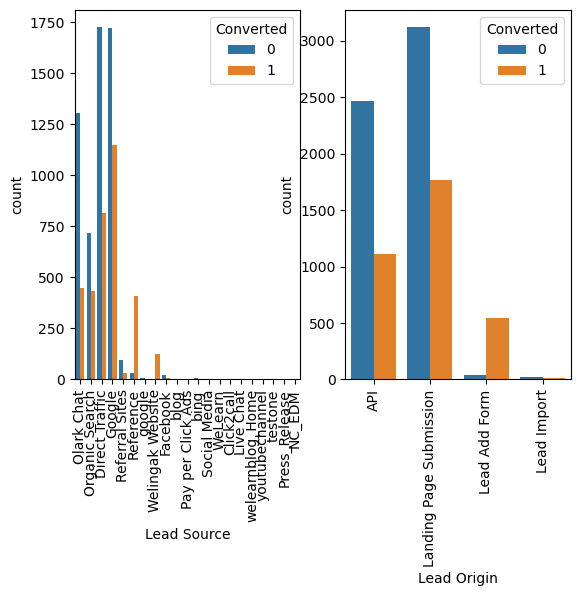

In [48]:
plt.subplot(1, 2, 1)
sns.countplot(data=lead, x='Lead Source', hue="Converted")
plt.xticks(rotation=90)
plt.title('')

plt.subplot(1, 2, 2)
sns.countplot(data=lead, x='Lead Origin', hue="Converted")
plt.xticks(rotation=90)
plt.title('')
plt.show()